In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import seaborn as sns
airbnb=pd.read_csv("listings.csv")
airbnb.columns
airbnb.drop([ 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified','bathrooms',
       'bathrooms_text', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes','neighbourhood_group_cleansed',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month','accommodates','neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude' ], axis=1, inplace=True)





# re-ordering the columns

# this is the final dataframe to calculate the peak season and off season



In [3]:
airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb.price.isna().sum()

<ipython-input-3-c020161d56e3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


0

In [4]:
airbnb


,id,property_type,room_type,amenities,price
0,3781,Entire rental unit,Entire home/apt,"[""Shampoo"", ""Microwave"", ""Patio or balcony"", ""...",125
1,5506,Entire guest suite,Entire home/apt,"[""Shampoo"", ""Microwave"", ""Air conditioning"", ""...",124
2,6695,Entire condominium (condo),Entire home/apt,"[""Shampoo"", ""Microwave"", ""Stove"", ""Air conditi...",164
3,8789,Entire rental unit,Entire home/apt,"[""Microwave"", ""Patio or balcony"", ""Stove"", ""Ai...",110
4,10730,Entire rental unit,Entire home/apt,"[""Microwave"", ""Patio or balcony"", ""Stove"", ""Ai...",100
...,...,...,...,...,...
3244,52856176,Entire condominium (condo),Entire home/apt,"[""Indoor fireplace"", ""Washer"", ""TV"", ""Dedicate...",220
3245,52863673,Entire rental unit,Entire home/apt,"[""TV"", ""Security cameras on property"", ""Dedica...",211
3246,52872248,Private room in rental unit,Private room,"[""Microwave"", ""Stove"", ""Air conditioning"", ""La...",55
3247,52872801,Private room in rental unit,Private room,"[""Microwave"", ""Stove"", ""Air conditioning"", ""La...",55


In [5]:
airbnb["amenities"].value_counts()

["Shampoo", "Microwave", "Baking sheet", "Stove", "Pool", "Hair dryer", "Oven", "Private entrance", "Bed linens", "Smoke alarm", "Washer", "Long term stays allowed", "Iron", "Kitchen", "Carbon monoxide alarm", "Refrigerator", "Hangers", "Essentials", "Coffee maker", "Wifi", "Extra pillows and blankets", "Gym", "Shower gel", "Dishes and silverware", "TV", "Cooking basics", "Dryer", "Hot water", "Lockbox"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        40
["Shampoo", "Microwave", "Patio or balcony", "Stove", "Pool", "EV charger", "Hair drye

In [6]:
airbnb["amenities"] = airbnb["amenities"].apply(eval)

In [7]:
for i, l in enumerate(airbnb["amenities"]):
    print("list",i,"is",type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

list 317 is <class 'list'>
list 318 is <class 'list'>
list 319 is <class 'list'>
list 320 is <class 'list'>
list 321 is <class 'list'>
list 322 is <class 'list'>
list 323 is <class 'list'>
list 324 is <class 'list'>
list 325 is <class 'list'>
list 326 is <class 'list'>
list 327 is <class 'list'>
list 328 is <class 'list'>
list 329 is <class 'list'>
list 330 is <class 'list'>
list 331 is <class 'list'>
list 332 is <class 'list'>
list 333 is <class 'list'>
list 334 is <class 'list'>
list 335 is <class 'list'>
list 336 is <class 'list'>
list 337 is <class 'list'>
list 338 is <class 'list'>
list 339 is <class 'list'>
list 340 is <class 'list'>
list 341 is <class 'list'>
list 342 is <class 'list'>
list 343 is <class 'list'>
list 344 is <class 'list'>
list 345 is <class 'list'>
list 346 is <class 'list'>
list 347 is <class 'list'>
list 348 is <class 'list'>
list 349 is <class 'list'>
list 350 is <class 'list'>
list 351 is <class 'list'>
list 352 is <class 'list'>
list 353 is <class 'list'>
l

list 633 is <class 'list'>
list 634 is <class 'list'>
list 635 is <class 'list'>
list 636 is <class 'list'>
list 637 is <class 'list'>
list 638 is <class 'list'>
list 639 is <class 'list'>
list 640 is <class 'list'>
list 641 is <class 'list'>
list 642 is <class 'list'>
list 643 is <class 'list'>
list 644 is <class 'list'>
list 645 is <class 'list'>
list 646 is <class 'list'>
list 647 is <class 'list'>
list 648 is <class 'list'>
list 649 is <class 'list'>
list 650 is <class 'list'>
list 651 is <class 'list'>
list 652 is <class 'list'>
list 653 is <class 'list'>
list 654 is <class 'list'>
list 655 is <class 'list'>
list 656 is <class 'list'>
list 657 is <class 'list'>
list 658 is <class 'list'>
list 659 is <class 'list'>
list 660 is <class 'list'>
list 661 is <class 'list'>
list 662 is <class 'list'>
list 663 is <class 'list'>
list 664 is <class 'list'>
list 665 is <class 'list'>
list 666 is <class 'list'>
list 667 is <class 'list'>
list 668 is <class 'list'>
list 669 is <class 'list'>
l

list 967 is <class 'list'>
list 968 is <class 'list'>
list 969 is <class 'list'>
list 970 is <class 'list'>
list 971 is <class 'list'>
list 972 is <class 'list'>
list 973 is <class 'list'>
list 974 is <class 'list'>
list 975 is <class 'list'>
list 976 is <class 'list'>
list 977 is <class 'list'>
list 978 is <class 'list'>
list 979 is <class 'list'>
list 980 is <class 'list'>
list 981 is <class 'list'>
list 982 is <class 'list'>
list 983 is <class 'list'>
list 984 is <class 'list'>
list 985 is <class 'list'>
list 986 is <class 'list'>
list 987 is <class 'list'>
list 988 is <class 'list'>
list 989 is <class 'list'>
list 990 is <class 'list'>
list 991 is <class 'list'>
list 992 is <class 'list'>
list 993 is <class 'list'>
list 994 is <class 'list'>
list 995 is <class 'list'>
list 996 is <class 'list'>
list 997 is <class 'list'>
list 998 is <class 'list'>
list 999 is <class 'list'>
list 1000 is <class 'list'>
list 1001 is <class 'list'>
list 1002 is <class 'list'>
list 1003 is <class 'list

list 1294 is <class 'list'>
list 1295 is <class 'list'>
list 1296 is <class 'list'>
list 1297 is <class 'list'>
list 1298 is <class 'list'>
list 1299 is <class 'list'>
list 1300 is <class 'list'>
list 1301 is <class 'list'>
list 1302 is <class 'list'>
list 1303 is <class 'list'>
list 1304 is <class 'list'>
list 1305 is <class 'list'>
list 1306 is <class 'list'>
list 1307 is <class 'list'>
list 1308 is <class 'list'>
list 1309 is <class 'list'>
list 1310 is <class 'list'>
list 1311 is <class 'list'>
list 1312 is <class 'list'>
list 1313 is <class 'list'>
list 1314 is <class 'list'>
list 1315 is <class 'list'>
list 1316 is <class 'list'>
list 1317 is <class 'list'>
list 1318 is <class 'list'>
list 1319 is <class 'list'>
list 1320 is <class 'list'>
list 1321 is <class 'list'>
list 1322 is <class 'list'>
list 1323 is <class 'list'>
list 1324 is <class 'list'>
list 1325 is <class 'list'>
list 1326 is <class 'list'>
list 1327 is <class 'list'>
list 1328 is <class 'list'>
list 1329 is <class 

list 1614 is <class 'list'>
list 1615 is <class 'list'>
list 1616 is <class 'list'>
list 1617 is <class 'list'>
list 1618 is <class 'list'>
list 1619 is <class 'list'>
list 1620 is <class 'list'>
list 1621 is <class 'list'>
list 1622 is <class 'list'>
list 1623 is <class 'list'>
list 1624 is <class 'list'>
list 1625 is <class 'list'>
list 1626 is <class 'list'>
list 1627 is <class 'list'>
list 1628 is <class 'list'>
list 1629 is <class 'list'>
list 1630 is <class 'list'>
list 1631 is <class 'list'>
list 1632 is <class 'list'>
list 1633 is <class 'list'>
list 1634 is <class 'list'>
list 1635 is <class 'list'>
list 1636 is <class 'list'>
list 1637 is <class 'list'>
list 1638 is <class 'list'>
list 1639 is <class 'list'>
list 1640 is <class 'list'>
list 1641 is <class 'list'>
list 1642 is <class 'list'>
list 1643 is <class 'list'>
list 1644 is <class 'list'>
list 1645 is <class 'list'>
list 1646 is <class 'list'>
list 1647 is <class 'list'>
list 1648 is <class 'list'>
list 1649 is <class 

list 1907 is <class 'list'>
list 1908 is <class 'list'>
list 1909 is <class 'list'>
list 1910 is <class 'list'>
list 1911 is <class 'list'>
list 1912 is <class 'list'>
list 1913 is <class 'list'>
list 1914 is <class 'list'>
list 1915 is <class 'list'>
list 1916 is <class 'list'>
list 1917 is <class 'list'>
list 1918 is <class 'list'>
list 1919 is <class 'list'>
list 1920 is <class 'list'>
list 1921 is <class 'list'>
list 1922 is <class 'list'>
list 1923 is <class 'list'>
list 1924 is <class 'list'>
list 1925 is <class 'list'>
list 1926 is <class 'list'>
list 1927 is <class 'list'>
list 1928 is <class 'list'>
list 1929 is <class 'list'>
list 1930 is <class 'list'>
list 1931 is <class 'list'>
list 1932 is <class 'list'>
list 1933 is <class 'list'>
list 1934 is <class 'list'>
list 1935 is <class 'list'>
list 1936 is <class 'list'>
list 1937 is <class 'list'>
list 1938 is <class 'list'>
list 1939 is <class 'list'>
list 1940 is <class 'list'>
list 1941 is <class 'list'>
list 1942 is <class 

list 2221 is <class 'list'>
list 2222 is <class 'list'>
list 2223 is <class 'list'>
list 2224 is <class 'list'>
list 2225 is <class 'list'>
list 2226 is <class 'list'>
list 2227 is <class 'list'>
list 2228 is <class 'list'>
list 2229 is <class 'list'>
list 2230 is <class 'list'>
list 2231 is <class 'list'>
list 2232 is <class 'list'>
list 2233 is <class 'list'>
list 2234 is <class 'list'>
list 2235 is <class 'list'>
list 2236 is <class 'list'>
list 2237 is <class 'list'>
list 2238 is <class 'list'>
list 2239 is <class 'list'>
list 2240 is <class 'list'>
list 2241 is <class 'list'>
list 2242 is <class 'list'>
list 2243 is <class 'list'>
list 2244 is <class 'list'>
list 2245 is <class 'list'>
list 2246 is <class 'list'>
list 2247 is <class 'list'>
list 2248 is <class 'list'>
list 2249 is <class 'list'>
list 2250 is <class 'list'>
list 2251 is <class 'list'>
list 2252 is <class 'list'>
list 2253 is <class 'list'>
list 2254 is <class 'list'>
list 2255 is <class 'list'>
list 2256 is <class 

list 2526 is <class 'list'>
list 2527 is <class 'list'>
list 2528 is <class 'list'>
list 2529 is <class 'list'>
list 2530 is <class 'list'>
list 2531 is <class 'list'>
list 2532 is <class 'list'>
list 2533 is <class 'list'>
list 2534 is <class 'list'>
list 2535 is <class 'list'>
list 2536 is <class 'list'>
list 2537 is <class 'list'>
list 2538 is <class 'list'>
list 2539 is <class 'list'>
list 2540 is <class 'list'>
list 2541 is <class 'list'>
list 2542 is <class 'list'>
list 2543 is <class 'list'>
list 2544 is <class 'list'>
list 2545 is <class 'list'>
list 2546 is <class 'list'>
list 2547 is <class 'list'>
list 2548 is <class 'list'>
list 2549 is <class 'list'>
list 2550 is <class 'list'>
list 2551 is <class 'list'>
list 2552 is <class 'list'>
list 2553 is <class 'list'>
list 2554 is <class 'list'>
list 2555 is <class 'list'>
list 2556 is <class 'list'>
list 2557 is <class 'list'>
list 2558 is <class 'list'>
list 2559 is <class 'list'>
list 2560 is <class 'list'>
list 2561 is <class 

list 2840 is <class 'list'>
list 2841 is <class 'list'>
list 2842 is <class 'list'>
list 2843 is <class 'list'>
list 2844 is <class 'list'>
list 2845 is <class 'list'>
list 2846 is <class 'list'>
list 2847 is <class 'list'>
list 2848 is <class 'list'>
list 2849 is <class 'list'>
list 2850 is <class 'list'>
list 2851 is <class 'list'>
list 2852 is <class 'list'>
list 2853 is <class 'list'>
list 2854 is <class 'list'>
list 2855 is <class 'list'>
list 2856 is <class 'list'>
list 2857 is <class 'list'>
list 2858 is <class 'list'>
list 2859 is <class 'list'>
list 2860 is <class 'list'>
list 2861 is <class 'list'>
list 2862 is <class 'list'>
list 2863 is <class 'list'>
list 2864 is <class 'list'>
list 2865 is <class 'list'>
list 2866 is <class 'list'>
list 2867 is <class 'list'>
list 2868 is <class 'list'>
list 2869 is <class 'list'>
list 2870 is <class 'list'>
list 2871 is <class 'list'>
list 2872 is <class 'list'>
list 2873 is <class 'list'>
list 2874 is <class 'list'>
list 2875 is <class 

list 3154 is <class 'list'>
list 3155 is <class 'list'>
list 3156 is <class 'list'>
list 3157 is <class 'list'>
list 3158 is <class 'list'>
list 3159 is <class 'list'>
list 3160 is <class 'list'>
list 3161 is <class 'list'>
list 3162 is <class 'list'>
list 3163 is <class 'list'>
list 3164 is <class 'list'>
list 3165 is <class 'list'>
list 3166 is <class 'list'>
list 3167 is <class 'list'>
list 3168 is <class 'list'>
list 3169 is <class 'list'>
list 3170 is <class 'list'>
list 3171 is <class 'list'>
list 3172 is <class 'list'>
list 3173 is <class 'list'>
list 3174 is <class 'list'>
list 3175 is <class 'list'>
list 3176 is <class 'list'>
list 3177 is <class 'list'>
list 3178 is <class 'list'>
list 3179 is <class 'list'>
list 3180 is <class 'list'>
list 3181 is <class 'list'>
list 3182 is <class 'list'>
list 3183 is <class 'list'>
list 3184 is <class 'list'>
list 3185 is <class 'list'>
list 3186 is <class 'list'>
list 3187 is <class 'list'>
list 3188 is <class 'list'>
list 3189 is <class 

In [8]:
fruits_expanded_v1 = airbnb["amenities"].apply(pd.Series)

In [9]:
fruits_expanded_v1

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,Shampoo,Microwave,Patio or balcony,Stove,Air conditioning,Hair dryer,TV with standard cable,Oven,Bed linens,Smoke alarm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shampoo,Microwave,Air conditioning,Hair dryer,TV with standard cable,Private entrance,Bed linens,Bathtub,Smoke alarm,Washer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shampoo,Microwave,Stove,Air conditioning,Hair dryer,TV with standard cable,Oven,Smoke alarm,Washer,Dedicated workspace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Microwave,Patio or balcony,Stove,Air conditioning,Hair dryer,Elevator,TV with standard cable,Smoke alarm,Washer,Dedicated workspace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Microwave,Patio or balcony,Stove,Air conditioning,Hair dryer,Elevator,TV with standard cable,Bed linens,Smoke alarm,Washer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,Indoor fireplace,Washer,TV,Dedicated workspace,First aid kit,Long term stays allowed,Fire extinguisher,Air conditioning,Fire pit,Wifi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3245,TV,Security cameras on property,Dedicated workspace,Essentials,Long term stays allowed,Cooking basics,Air conditioning,Wifi,Elevator,Kitchen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3246,Microwave,Stove,Air conditioning,Laundromat nearby,Oven,Bed linens,Smoke alarm,Dedicated workspace,Dishwasher,Long term stays allowed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3247,Microwave,Stove,Air conditioning,Laundromat nearby,Oven,Bed linens,Smoke alarm,Washer,Dedicated workspace,Dishwasher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
fruit_dict = {}
for i in airbnb["amenities"]:
    for j in i:
        if j not in fruit_dict:
            fruit_dict[j] = 1
        else:
            fruit_dict[j] += 1

In [11]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [12]:
to_1D(airbnb["amenities"]).value_counts().index

Index(['Smoke alarm', 'Wifi', 'Long term stays allowed',
       'Carbon monoxide alarm', 'Kitchen', 'Heating', 'Essentials', 'Hangers',
       'Hair dryer', 'Air conditioning',
       ...
       '32" HDTV with Netflix', ':) conditioner',
       'Clothing storage: dresser and walk-in closet', 'Wifi – 1200 Mbps',
       'Dove, Olay Body Wash with Retinol, and Axe Body Wash body soap',
       'Liquid shampoo', 'hypoallergenic body soap',
       '65" HDTV with Amazon Prime Video, Netflix, Roku',
       '65" HDTV with Chromecast, Netflix', 'Nexus or Kirkland shampoo'],
      dtype='object', length=510)

In [15]:
to_1D(airbnb["amenities"]).value_counts().head(10)

Smoke alarm                3146
Wifi                       3116
Long term stays allowed    3075
Carbon monoxide alarm      2944
Kitchen                    2909
Heating                    2876
Essentials                 2875
Hangers                    2774
Hair dryer                 2645
Air conditioning           2585
dtype: int64

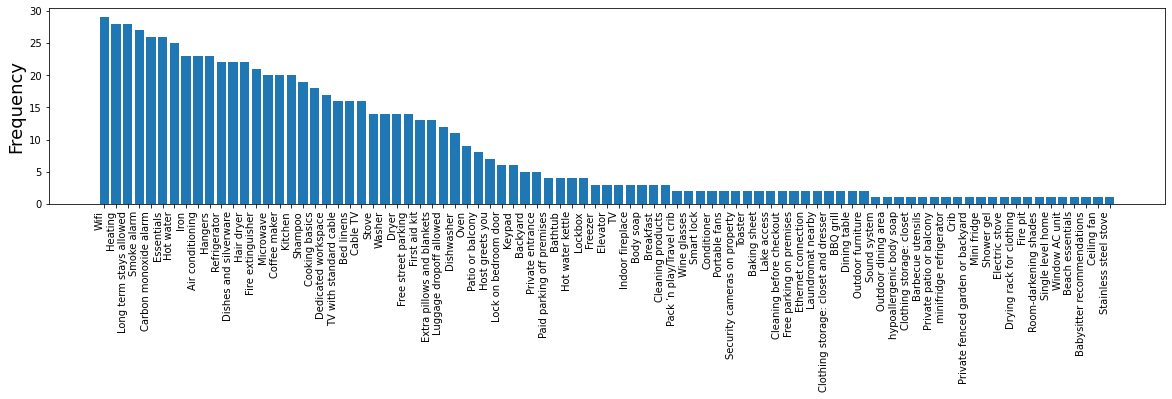

In [14]:
fig, ax = plt.subplots(figsize = (20,4))
ax.bar(to_1D(airbnb["amenities"].iloc[1:30]).value_counts().index,
        to_1D(airbnb["amenities"].iloc[1:30]).value_counts())
ax.set_ylabel("Frequency", size = 18)
fig.autofmt_xdate(rotation=90 ) 


In [54]:
newdata=to_1D(airbnb["amenities"])
len(newdata)

89021

In [55]:
newdata.drop_duplicates(keep='first',inplace=True)
len(newdata)

510

In [56]:
newdata.to_dict()
#newdata


{0: 'Shampoo',
 1: 'Microwave',
 2: 'Patio or balcony',
 3: 'Stove',
 4: 'Air conditioning',
 5: 'Hair dryer',
 6: 'TV with standard cable',
 7: 'Oven',
 8: 'Bed linens',
 9: 'Smoke alarm',
 10: 'Washer',
 11: 'Dedicated workspace',
 12: 'Dishwasher',
 13: 'Long term stays allowed',
 14: 'Iron',
 15: 'Free parking on premises',
 16: 'Kitchen',
 17: 'Carbon monoxide alarm',
 18: 'Refrigerator',
 19: 'Hangers',
 20: 'Essentials',
 21: 'Coffee maker',
 22: 'Wifi',
 23: 'Extra pillows and blankets',
 24: 'Cable TV',
 25: 'Dishes and silverware',
 26: 'Free street parking',
 27: 'Heating',
 28: 'Cooking basics',
 29: 'Dryer',
 30: 'Hot water',
 36: 'Private entrance',
 38: 'Bathtub',
 42: 'First aid kit',
 44: 'Fire extinguisher',
 46: 'Luggage dropoff allowed',
 59: 'Keypad',
 96: 'Elevator',
 111: 'Paid parking off premises',
 145: 'Ethernet connection',
 193: 'Lockbox',
 219: 'Electric stove',
 220: 'Freezer',
 237: 'Smart lock',
 249: 'Security cameras on property',
 253: 'Pack ’n play/

In [57]:
unique_values = dict((v,k) for k,v in newdata.items())
unique_values 

{'Shampoo': 0,
 'Microwave': 1,
 'Patio or balcony': 2,
 'Stove': 3,
 'Air conditioning': 4,
 'Hair dryer': 5,
 'TV with standard cable': 6,
 'Oven': 7,
 'Bed linens': 8,
 'Smoke alarm': 9,
 'Washer': 10,
 'Dedicated workspace': 11,
 'Dishwasher': 12,
 'Long term stays allowed': 13,
 'Iron': 14,
 'Free parking on premises': 15,
 'Kitchen': 16,
 'Carbon monoxide alarm': 17,
 'Refrigerator': 18,
 'Hangers': 19,
 'Essentials': 20,
 'Coffee maker': 21,
 'Wifi': 22,
 'Extra pillows and blankets': 23,
 'Cable TV': 24,
 'Dishes and silverware': 25,
 'Free street parking': 26,
 'Heating': 27,
 'Cooking basics': 28,
 'Dryer': 29,
 'Hot water': 30,
 'Private entrance': 36,
 'Bathtub': 38,
 'First aid kit': 42,
 'Fire extinguisher': 44,
 'Luggage dropoff allowed': 46,
 'Keypad': 59,
 'Elevator': 96,
 'Paid parking off premises': 111,
 'Ethernet connection': 145,
 'Lockbox': 193,
 'Electric stove': 219,
 'Freezer': 220,
 'Smart lock': 237,
 'Security cameras on property': 249,
 'Pack ’n play/Trave

In [58]:
airbnb["amenities"]

0       [Shampoo, Microwave, Patio or balcony, Stove, ...
1       [Shampoo, Microwave, Air conditioning, Hair dr...
2       [Shampoo, Microwave, Stove, Air conditioning, ...
3       [Microwave, Patio or balcony, Stove, Air condi...
4       [Microwave, Patio or balcony, Stove, Air condi...
                              ...                        
3244    [Indoor fireplace, Washer, TV, Dedicated works...
3245    [TV, Security cameras on property, Dedicated w...
3246    [Microwave, Stove, Air conditioning, Laundroma...
3247    [Microwave, Stove, Air conditioning, Laundroma...
3248    [Microwave, Stove, Air conditioning, Laundroma...
Name: amenities, Length: 3249, dtype: object

In [59]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [60]:
fruits_bool = boolean_df( airbnb["amenities"],
                         unique_values.keys())
fruits_bool

,Shampoo,Microwave,Patio or balcony,Stove,Air conditioning,Hair dryer,TV with standard cable,Oven,Bed linens,Smoke alarm,...,Organic shampoo,Organic body soap,Indoor pool,HDTV with Amazon Prime Video,HDTV with Netflix,"65"" HDTV with Chromecast, Netflix",GE Profile refrigerator,"65"" HDTV with Amazon Prime Video, HBO Max, Netflix",GE Profile stainless steel oven,GE Profile stainless steel gas stove
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,True,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3245,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3246,False,True,False,True,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3247,False,True,False,True,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [37]:
#fruits_bool['id']=airbnb['id']

#fruits_bool['price']=airbnb['price']

In [39]:
#gkk = fruits_bool.groupby(['id', 'price'])


In [40]:
res=fruits_bool.T

In [41]:

res

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
Shampoo,True,True,True,False,False,True,False,False,False,True,...,True,False,True,True,True,False,False,False,False,False
Microwave,True,True,True,True,True,True,True,True,False,True,...,True,False,False,True,True,False,False,True,True,True
Patio or balcony,True,False,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Stove,True,False,True,True,True,True,False,False,False,True,...,False,False,False,True,True,False,False,True,True,True
Air conditioning,True,True,True,True,True,True,True,True,False,True,...,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"65"" HDTV with Chromecast, Netflix",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GE Profile refrigerator,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"65"" HDTV with Amazon Prime Video, HBO Max, Netflix",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GE Profile stainless steel oven,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
fruits_bool['Shampoo'].value_counts()

True     2438
False     811
Name: Shampoo, dtype: int64

In [63]:
fruits_bool['id']=airbnb['id']
fruits_bool['price']=airbnb['price']

In [48]:
fruits_bool.replace(to_replace =["False"], 
                            value ="0",inplace=True)
fruits_bool.replace(to_replace =["True"], 
                            value ="1",inplace=True)


In [66]:
final_binary=fruits_bool.astype(int)

In [67]:
final_binary

,Shampoo,Microwave,Patio or balcony,Stove,Air conditioning,Hair dryer,TV with standard cable,Oven,Bed linens,Smoke alarm,...,Indoor pool,HDTV with Amazon Prime Video,HDTV with Netflix,"65"" HDTV with Chromecast, Netflix",GE Profile refrigerator,"65"" HDTV with Amazon Prime Video, HBO Max, Netflix",GE Profile stainless steel oven,GE Profile stainless steel gas stove,id,price
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,3781,125
1,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,5506,124
2,1,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,6695,164
3,0,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,8789,110
4,0,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,10730,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,52856176,220
3245,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,52863673,211
3246,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,52872248,55
3247,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,52872801,55
